### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import sys, os
from haversine import haversine
import seaborn as sns

import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


### Loading the CSV Data into a Pandas Dataframe ### 

In [2]:
df = pd.read_csv("D:\\Climate Change Hackathon Data\\MilaClimateChangeHackathon2019-master\\MilaClimateChangeHackathon2019-master\\data\\Accidents_2012_2017\\Dataset_Final.csv",index_col=0)

### Outlining the possible target variables ###

In [3]:
possible_targets = ['Number of Incidents', 'Implied vehicules', 'Serious injury',
       'Light injury', 'Total victims', 'Trucks and car', 'Heavy tractor',
       'Tool equipment', 'Bus', 'Bicycle', 'Moped', 'Motorcycle',
       'Emergency vehicule', 'Snowmobile', 'VHR', 'Other types',
       'Non-Precise vehicule', 'Pedestrian death', 'Pedestrian injury',
       'Pedestrian victims', 'Motorcycle death', 'Motorcycle injuries',
       'Motorcycle victims', 'Bicycle death', 'Bicycle injury',
       'Bicycle victims', 'Severity: Inferior damages',
       'Severity: Material damages', 'Severity: Serious injury',
       'Severity: Light injury', 'Severity: Death']

In [4]:
target = 'Number of Incidents'
targets = [*possible_targets]
targets.remove(target)

### Defining the training and testing set splits ### 

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(possible_targets, axis=1), df[target], test_size=0.33)

### Model 1: Random Forest Regressor - Commencing the training process ### 

In [7]:
model = RandomForestRegressor()

In [8]:
params = {
    'n_estimators' : [2,5,10],
    'max_depth' : [5, 10, 15],
    'min_samples_leaf' : [5,10,15]
}

In [9]:
gcv = GridSearchCV(model, params, verbose=2)

In [10]:
gcv.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] max_depth=5, min_samples_leaf=5, n_estimators=2 .................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .. max_depth=5, min_samples_leaf=5, n_estimators=2, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, n_estimators=2 .................
[CV] .. max_depth=5, min_samples_leaf=5, n_estimators=2, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, n_estimators=2 .................
[CV] .. max_depth=5, min_samples_leaf=5, n_estimators=2, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, n_estimators=5 .................
[CV] .. max_depth=5, min_samples_leaf=5, n_estimators=5, total=   0.1s
[CV] max_depth=5, min_samples_leaf=5, n_estimators=5 .................
[CV] .. max_depth=5, min_samples_leaf=5, n_estimators=5, total=   0.2s
[CV] max_depth=5, min_samples_leaf=5, n_estimators=5 .................
[CV] .. max_depth=5, min_samples_leaf=5, n_estimators=5, total=   0.2s
[CV] max_depth=5, min_samples_leaf=5, n_estimators=10 ................
[CV] . max_depth=5, min_samples_leaf=5, n_estimators=10, total=   0.4s
[CV] max_depth=5, min_samples_leaf=5, n_estimators=10 ................
[CV] .

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:   33.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [2, 5, 10], 'max_depth': [5, 10, 15], 'min_samples_leaf': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [11]:
parameters = (gcv.best_params_)


In [12]:
parameters

{'max_depth': 10, 'min_samples_leaf': 15, 'n_estimators': 10}

In [13]:
rf = RandomForestRegressor(max_depth=10, min_samples_leaf=15, n_estimators=10)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

### Outputting the Mean Absolute Error to assess the Random Forest Regressor Model ### 

In [14]:
from sklearn.metrics import mean_absolute_error

In [15]:
mae_value = mean_absolute_error(y_test, y_pred)

In [16]:
score = mae_value/y_test.mean()

In [17]:
score

0.3641160409602402

### Feature Importance Analysis

In [18]:
import seaborn as sns
import matplotlib

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

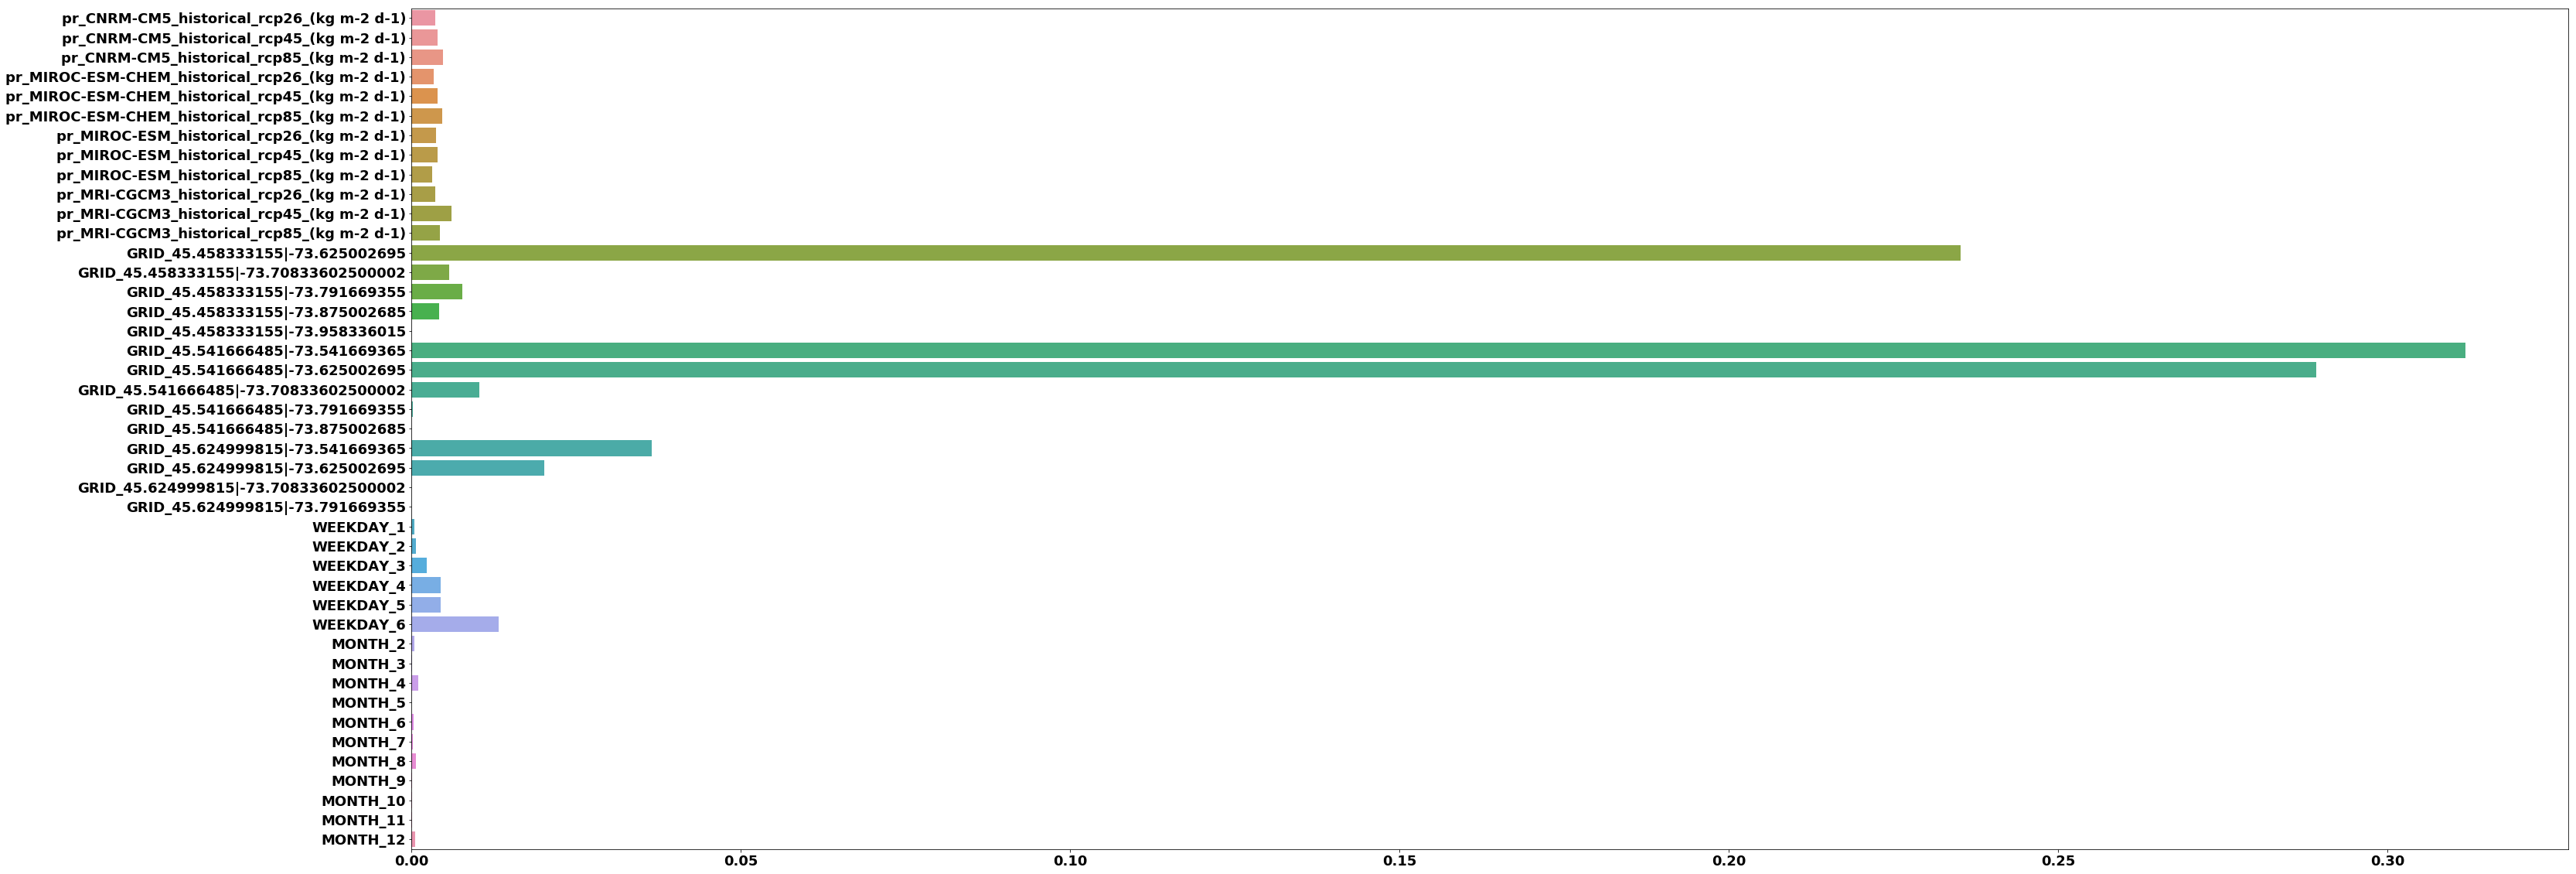

In [21]:
plt.figure(figsize=(50, 20))
sns.barplot(x=rf.feature_importances_, y=X_train.columns)

### Model 2: Gradient Boosting Regressor ### 

In [24]:
model = GradientBoostingRegressor()

In [25]:
params = {
    'n_estimators' : [2,5,10,15],
    'max_depth' : [2,5, 10, 15],
    'learning_rate' : [0.1,0.2,0.3,0.4]
}

In [26]:
gcv = GridSearchCV(model, params, verbose=2)

In [28]:
gcv.fit(X_train, y_train)

In [19]:
gcv.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 15}

In [29]:
gbf = GradientBoostingRegressor(max_depth=5, learning_rate=0.3, n_estimators=15)
gbf = gbf.fit(X_train, y_train)
y_pred = gbf.predict(X_test)

### Outputting the Mean Absolute Error 

In [30]:
mae_value = mean_absolute_error(y_test, y_pred)

In [31]:
score = mae_value/y_test.mean()

In [32]:
score

0.3631141292650966

### Feature Importance Analysis 

In [33]:
import seaborn as sns
import matplotlib

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

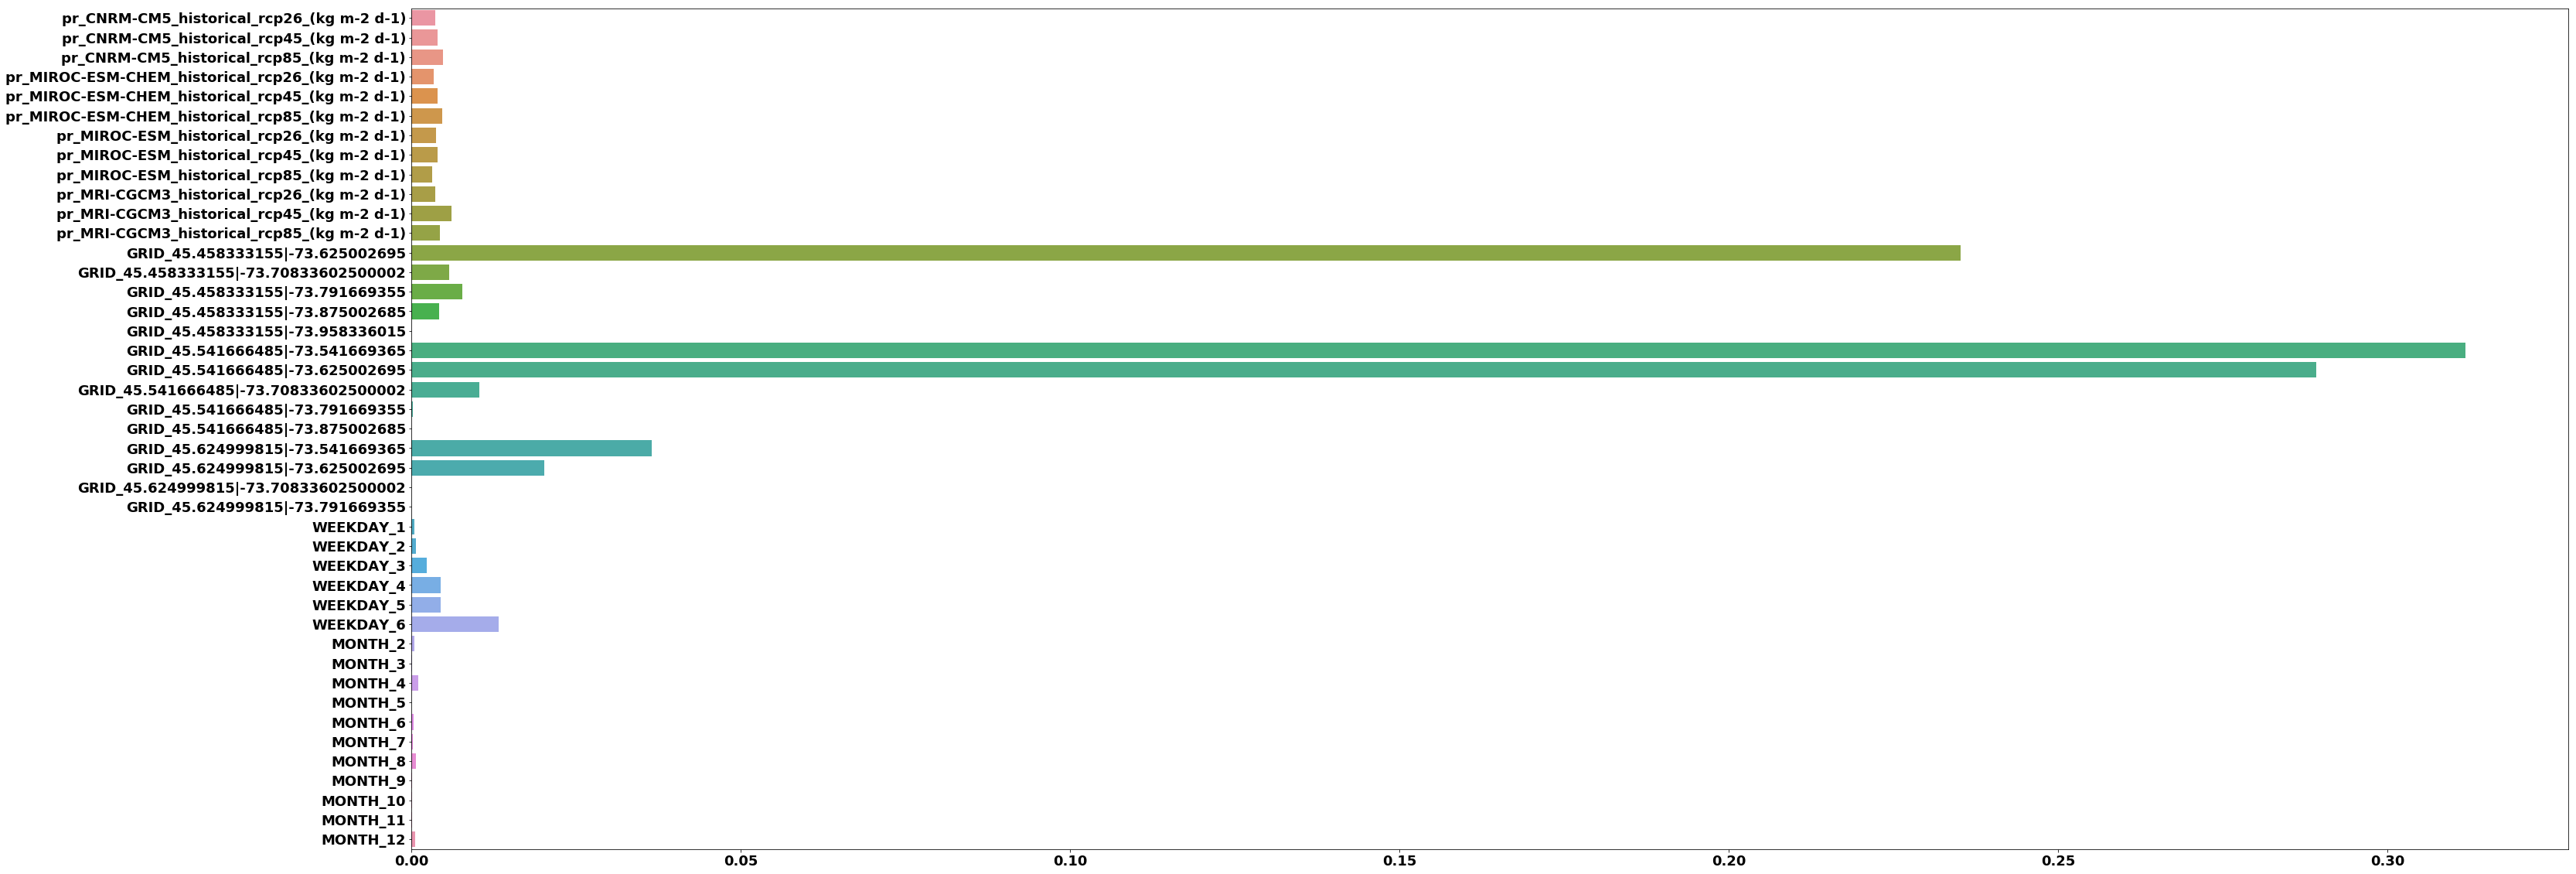

In [34]:
plt.figure(figsize=(50, 20))
sns.barplot(x=rf.feature_importances_, y=X_train.columns)